In [5]:
#importan librerias

#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2

from glob import glob 
#Librerias de modelado
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path,size = (128,128)):
  files = glob(os.path.join(folder_path,"*"))
  label = os.path.basename(folder_path).strip().lower().replace(" ","_")
  X = map(plt.imread, files)
  X = map(lambda img: cv2.resize(img, size), X)
  X = list(X)
  y = [label] * len(X)
  return X,y 

In [9]:
image_size = (32,32)

In [11]:
#Cargamos los datos de entrenamiento de la clase 0 y clase 1
X_0, y_0 = load_folder_with_label("OK_Drives_Images_Augmentation",size = image_size)
X_1, y_1 = load_folder_with_label("NOK_Drives_Images_Augmentation",size = image_size)
X = X_0 + X_1
y = y_0 + y_1
del X_0 , X_1, y_0 , y_1

In [12]:
#Cargamos los datos de validacion de la clase 0 y clase 1
X_validation_0, y_validation_0 = load_folder_with_label("OK_Drives_Images_Augmentation",size = image_size)
X_validation_1, y_validation_1 = load_folder_with_label("NOK_Drives_Images_Augmentation",size = image_size)
X_validation = X_validation_0 + X_validation_1
y_validation = y_validation_0 + y_validation_1
del X_validation_0 , X_validation_1, y_validation_0 , y_validation_1

In [13]:
#codificamos la target
lbl = LabelEncoder()
y = lbl.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [17]:
y_validation = lbl.transform(y_validation)
y_validation

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

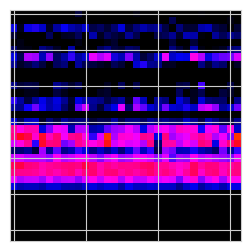

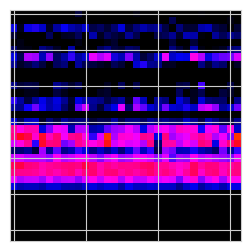

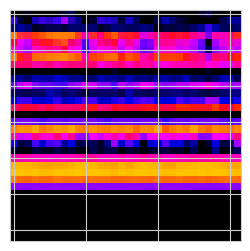

In [18]:
#Vistazo a nuestro dataset
for img in X[:3]:
  plt.figure(figsize = (3,3))
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(img, cmap = "gray")
  plt.show()

In [21]:
X = np.array(X)
X_validation = np.array(X_validation)

In [22]:
X.shape

(1000, 32, 32, 4)

In [28]:
#size = X.shape[1]*X.shape[2]
# X = X.reshape((len(X),size))
# X_validation = X_validation.reshape((len(X_validation),size))

In [25]:
#Partición de muestras entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [27]:
X_train.shape

(670, 32, 32, 4)

In [34]:
#Prueba para redimensionar X_Train
#X_train = X_train.reshape(None, 32, 32, 3)

In [29]:
# Crear el modelo secuencial
model = Sequential()

model.add(Flatten(input_shape=(image_size[0], image_size[1], 4)))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

#model.add(Dense(16, activation='relu'))

#model.add(Dense(units = 10, activation='softmax'))

# Agregar una capa de dropout con una tasa del 50%
model.add(Dropout(0.05))

# Agregar una capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

In [31]:
#Resumen de la arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 256)               1048832   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [49]:
# Compilar el modelo con el optimizador 'adam', la función de pérdida BinaryCrossentropy y métricas de precisión

model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba

history = model.fit(X_train, y_train, epochs=15, 
                    validation_data=(X_test, y_test))

Epoch 1/15
21/21 [==============================] - 1s 11ms/step - loss: 0.7173 - accuracy: 0.8478 - val_loss: 0.5410 - val_accuracy: 0.7364
Epoch 2/15
21/21 [==============================] - 0s 7ms/step - loss: 0.1588 - accuracy: 0.9388 - val_loss: 0.5485 - val_accuracy: 0.8485
Epoch 3/15
21/21 [==============================] - 0s 7ms/step - loss: 0.0333 - accuracy: 0.9910 - val_loss: 0.7782 - val_accuracy: 0.8333
Epoch 4/15
21/21 [==============================] - 0s 7ms/step - loss: 0.0498 - accuracy: 0.9821 - val_loss: 0.9160 - val_accuracy: 0.8333
Epoch 5/15
21/21 [==============================] - 0s 7ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 0.9766 - val_accuracy: 0.8485
Epoch 6/15
21/21 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.0292 - val_accuracy: 0.8424
Epoch 7/15
21/21 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.0188 - val_accuracy: 0.8606
Epoch 8/15
21/21 [=

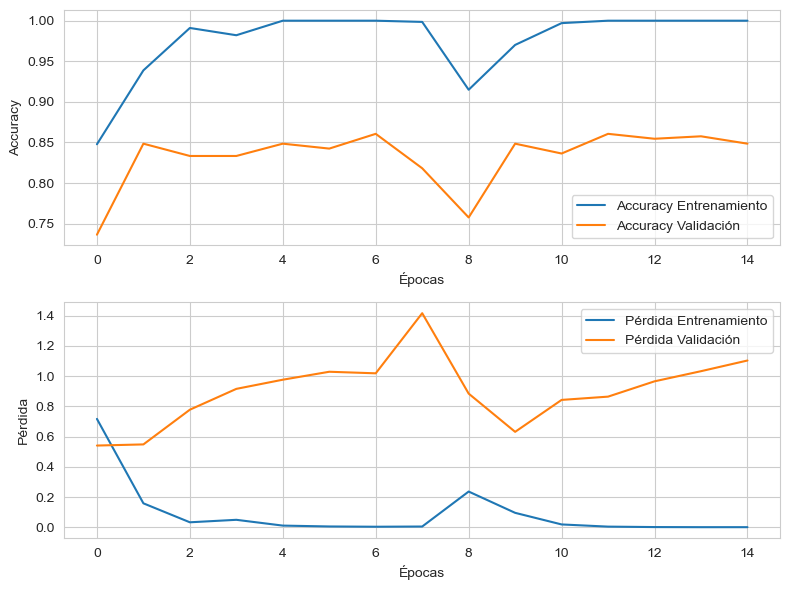

In [51]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [53]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)
y_proba_validation = model.predict(X_validation)
y_pred_validation = y_proba_validation.round().astype(int)

32/32 [==============================] - 0s 1ms/step


In [55]:
print("Train sample \n", classification_report(y_train, y_pred_train,target_names = lbl.classes_))
print("Test sample \n", classification_report(y_test, y_pred_test,target_names = lbl.classes_))
print("validation sample \n", classification_report(y_validation, y_pred_validation,target_names = lbl.classes_))

Train sample 
                                 precision    recall  f1-score   support

nok_drives_images_augmentation       1.00      1.00      1.00       335
 ok_drives_images_augmentation       1.00      1.00      1.00       335

                      accuracy                           1.00       670
                     macro avg       1.00      1.00      1.00       670
                  weighted avg       1.00      1.00      1.00       670

Test sample 
                                 precision    recall  f1-score   support

nok_drives_images_augmentation       0.83      0.88      0.85       165
 ok_drives_images_augmentation       0.87      0.82      0.84       165

                      accuracy                           0.85       330
                     macro avg       0.85      0.85      0.85       330
                  weighted avg       0.85      0.85      0.85       330

validation sample 
                                 precision    recall  f1-score   support

nok_driv

In [57]:
!pip install -q scikit-plot
import scikitplot as skplt

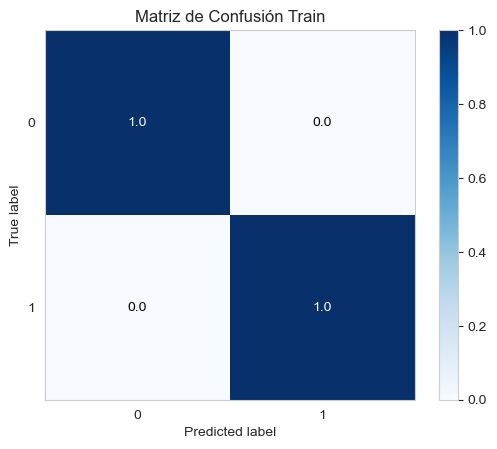

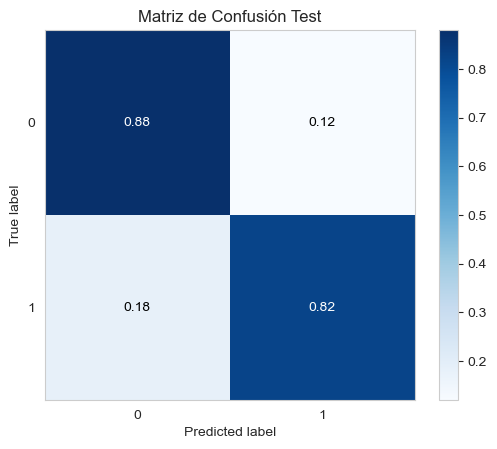

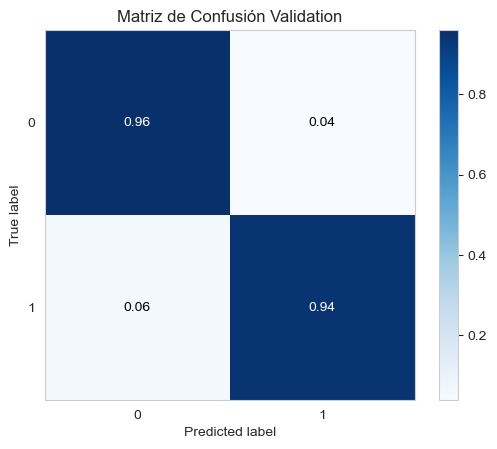

In [59]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

skplt.metrics.plot_confusion_matrix(y_validation, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')
plt.show() 